# Determining the cutout size

* I am using a scaling of R24.  2.5xD24 works well for high surface brightess galaxies, but not for LSB.
* can use D25 instead
  * D24 and D25 will be similar for HSB galaxies
  * D25 will be much greater for LSB galaxies
  
* need to determine the factor beyond R25

In [3]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import sys
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/havirgo/python/'))
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

In [4]:
tabledir = os.path.join(homedir,'research/Virgo/tables-north/v2/')
print(tabledir)
plotdir = os.path.join(homedir,'research/Virgo/plots/halpha/')
print(plotdir)

/home/rfinn/research/Virgo/tables-north/v2/
/home/rfinn/research/Virgo/plots/halpha/


In [5]:
%run ~/github/Virgo/programs/readtablesv2.py

# Compare R24 and R25

In [7]:
x = v.ephot['SMA_SB24']
y = v.ephot['SMA_SB25']

sb24 = 2.5*np.log10(v.ephot['FLUX_SB24_R']/x**2)
sb25 = 2.5*np.log10(v.ephot['FLUX_SB24_R']/x**2)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


Text(0, 0.5, 'SMA_SB25')

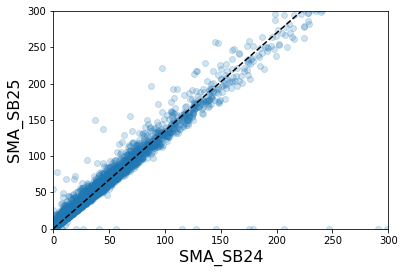

In [31]:
plt.figure()
plt.scatter(x,y,alpha=.2)
xline = np.linspace(0,300,100)
plt.plot(xline,1.35*xline,'k--')
plt.axis([0,300,0,300])
plt.xlabel("SMA_SB24",fontsize=16)
plt.ylabel("SMA_SB25",fontsize=16)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


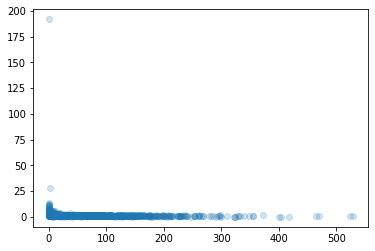

In [12]:
plt.figure()
plt.scatter(x,y/x,alpha=.2)

1.4099121


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


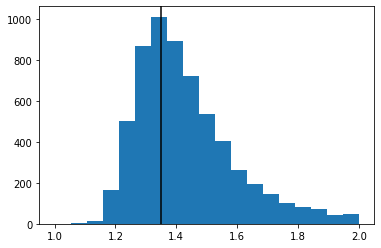

In [24]:
mybins = np.linspace(1,2,20)
plt.hist(y/x,bins=mybins)
plt.axvline(x=1.35,c='k')
print(np.nanmedian(y/x))

So a good scaling for galaxies that don't have R25 is to use

$$  SMA_SB25 = 1.35 SMA_SB24$